# Question 1: Download dataset and plot each class figure

4422102/4422102 [==============================] - 0s 0us/step


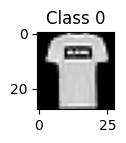

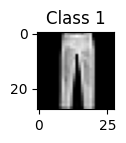

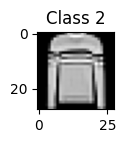

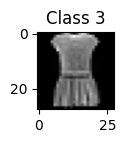

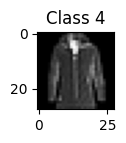

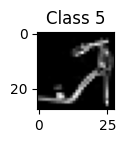

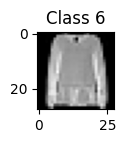

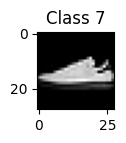

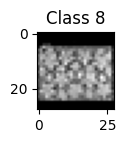

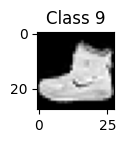

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import fashion_mnist


(x_train,y_train),(x_test,y_test)= fashion_mnist.load_data()
x_train=x_train/255
x_test=x_test/255





for i in range(10):
    plt.figure(figsize=(1, 1))

    # Find the index of the first image with the current class label
    # np.where returns many tuples where y_train==i from this choose first tuple then from this tuple first element
    # so np.where(y_train == i)[0][0] will retun index

    index = np.where(y_train == i)[0][0]

    # Plot the sample image

    plt.imshow(x_train[index],cmap='gray')
    plt.title("Class " + str(i))
    plt.show()



In [2]:
# import numpy as np
# import matplotlib.pyplot as plt
# from keras.datasets import fashion_mnist


# # Initialize wandb
# wandb.init(project='DL_Assignment_1_CS23M046', name='Sample Images Classes')

# (x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
# x_train = x_train / 255
# x_test = x_test / 255

# for i in range(10):
#     plt.figure(figsize=(1, 1))

#     # Find the index of the first image with the current class label
#     index = np.where(y_train == i)[0][0]

#     # Log the image along with its class label using wandb
#     wandb.log({f"Class_{i}": [wandb.Image(x_train[index], caption=f'Class {i}')]})

#     # Plot the sample image
#     plt.imshow(x_train[index], cmap='gray')
#     plt.title("Class " + str(i))
#     plt.show()



# wandb.finish()


In [3]:
# # Choose number of layer
# num_layers= 3

# # Choose number of nuerons per each layer
# num_neurons= 64

# num_classes =10


# X = x_train

# # Reshaping (60000,28,28) to (60000,784)
# X = X.reshape(X.shape[0], -1)


# n_features=X.shape[1]

# Weight Initialization Methods:

In [4]:
def randomweightsandbias(num_layers,num_neurons,n_features,num_classes):
    # Initialize Random weights and biases

    # These are W[0] and b[0] which are not in use

    W = [np.random.randn(num_neurons,n_features)]
    b = [np.random.randn(num_neurons,1)]

    # Here initializing W[1] and b[1]

    W.append(np.random.randn(num_neurons,n_features))  # Weight matrix for input layer
    b.append(np.random.randn(num_neurons,1))# Bias vector for input layer

    # Initializing intermidiate W and b

    for _ in range(num_layers - 2):
      W.append(np.random.randn(num_neurons, num_neurons))
      b.append(np.random.randn(num_neurons,1))

    # Initializing output layer W and b

    W.append(np.random.randn(num_classes,num_neurons))  # Weight matrix for output layer
    b.append(np.random.randn(num_classes,1))  # Bias vector for output layer

    return W,b

def xavier_init_weights(n_in, n_out):
    limit = np.sqrt(6.0 / (n_in + n_out))
    return np.random.uniform(-limit, limit, size=(n_in, n_out))

def xavier_init_bias(n_out):
    limit = np.sqrt(6.0 / n_out)
    return np.random.uniform(-limit, limit, size=(n_out, 1))

def xaviorweightsandbias(num_layers,num_neurons,n_features,num_classes):


    # These are W[0] and b[0] which are not in use

    W = [xavier_init_weights(num_neurons,n_features)]
    b = [xavier_init_bias(num_neurons)]

    # Here initializing W[1] and b[1]

    W.append(xavier_init_weights(num_neurons,n_features))  # Weight matrix for input layer
    b.append(xavier_init_bias(num_neurons))# Bias vector for input layer

    # Initializing intermidiate W and b

    for _ in range(num_layers - 2):
      W.append(xavier_init_weights(num_neurons, num_neurons))
      b.append(xavier_init_bias(num_neurons))

    # Initializing output layer W and b

    W.append(xavier_init_weights(num_classes,num_neurons))  # Weight matrix for output layer
    b.append(xavier_init_bias(num_classes))  # Bias vector for output layer


    return W,b


In [5]:
def initializeWeightandbias(initialize_method,num_layers,num_neurons,n_features,num_classes):

    if(initialize_method=='random'):
      return randomweightsandbias(num_layers,num_neurons,n_features,num_classes)

    elif(initialize_method=='Xavier'):
       return xaviorweightsandbias(num_layers,num_neurons,n_features,num_classes)



# initialize_method ='Xavior'

# W,b = initializeWeightandbias(initialize_method,3,4,728,10)



In [6]:
def sigmoid(data1):

  # As for high values or low values of data1 issue of overflow so to overcome that used clip

  sigmoid_x = 1 /(1+ np.exp(np.clip(-data1, -600, 600)))

  return sigmoid_x


def relu(x):
    return np.maximum(0, x)


def tanh(x):
    return np.tanh(x)


def softmax(data2):
    e_x =  np.exp(np.clip(data2, -400, 400))
    return e_x / np.sum(e_x)


def relu_derivative(x):
    return np.where(x > 0, 1, 0)


def sigmoid_derivative(x):

  sigmoid_x = 1 /(1+ np.exp(np.clip(-x, -600, 600)))
  return sigmoid_x * (1 - sigmoid_x)



def tanh_derivative(x):
    return 1 - np.tanh(x)**2

def one_hot_encoding(y,num_classes):
    encoded = np.zeros((num_classes,1))
    encoded[y] = 1

    return encoded

# Question 2: Feedforward Nueral Network

In [7]:
def feedforwardnn(data,num_layers,num_neurons,W,b,activation_function):


  n_features =len(data)

  a=[]
  h=[]

  a.append(data)
  h.append(data)




  for k in range(1, num_layers):

    a.append(b[k] + (W[k] @ h[k-1]))



    if(activation_function=="ReLU"):
      h.append(relu(a[k]))
    if(activation_function=="sigmoid"):
      h.append(sigmoid(a[k]))
    if(activation_function=="tanh"):
      h.append(tanh(a[k]))



  a.append(b[num_layers] + (W[num_layers] @ h[num_layers-1]))


  probability_distribution=(softmax(a[num_layers]))



  return a,h,probability_distribution


In [8]:
#Checking for first data point
# a,h,y_hat=feedforwardnn(X[0].reshape(784,1),num_layers,num_neurons,W,b,"ReLU")
# print(y_hat)


# Question 3: Backpropogation

In [9]:
def backward_propagation(inputs,h,a,W,b,actual_y,predicted_y,num_layers,num_classes,activation_function,loss_method):

    grad_with_a=[np.zeros_like(a[i]) for i in range(num_layers + 1)]
    grad_with_w=[np.zeros_like(W[i]) for i in range(num_layers + 1)]
    #q=[np.zeros_like(W[i]) for i in range(num_layers + 1)]
    grad_with_b=[np.zeros_like(b[i]) for i in range(num_layers + 1)]



    grad_with_h=[np.zeros_like(h[i]) for i in range(num_layers )]
    grad_with_h[0]=inputs

    y_encoded =  one_hot_encoding(actual_y,num_classes)

    if(loss_method=='cross_entropy'):
      grad_with_a[num_layers] = (predicted_y-y_encoded )

    else:
      grad_with_a[num_layers] = np.multiply(-2 * (predicted_y-y_encoded ),np.multiply(predicted_y,(1-predicted_y)))



    for k in range(num_layers, 0, -1):



        # Compute gradiant with respect to parameters



        grad_with_w[k]=(grad_with_a[k] @ (h[k-1].T))




        grad_with_b[k]=grad_with_a[k]

        # Compute gradian with respect to layer below

        grad_with_h[k-1] = W[k].T @ grad_with_a[k]

        # Compute gradian with respect to layer below (Pre activation)

        if(activation_function=="ReLU"):

          grad_with_a[k-1] = grad_with_h[k-1] * relu_derivative(a[k-1])

        elif(activation_function=="sigmoid"):

          grad_with_a[k-1] = grad_with_h[k-1] * sigmoid_derivative(a[k-1])

        elif(activation_function=="tanh"):

          grad_with_a[k-1] = grad_with_h[k-1] * tanh_derivative(a[k-1])




    return grad_with_w, grad_with_b




# grad_with_w, grad_with_b= backward_propagation(X[0].reshape(784,1),h,a,W,b,y_train[0],y_hat,"ReLU")

# Accuracy and Loss Function

In [10]:
def LossAccuracy(x_train,y_train,alpha,W,b,batch_size,activation_function,num_layers,n_features,num_classes,num_neurons,loss_method) :


    X = x_train.reshape(x_train.shape[0], -1)

     # For Training error

    #Initial loss is 0
    Loss_train = 0
    MSE_train = 0

    count_training=0

    for x,y in zip(X[:54000], y_train[:54000]):

      a,h,y_hat_training=feedforwardnn(x.reshape(784,1),num_layers,num_neurons,W,b,activation_function)

      y_predicted=np.argmax(y_hat_training)

      if(y==y_predicted):
        count_training += 1


      # Finding loss :
      if(loss_method=='cross_entropy'):
        if(y_hat_training[y]<=1e-6):
          Loss_train = Loss_train

        else:
          Loss_train = Loss_train + -np.log(np.clip(y_hat_training[y], 1e-6, 400))

        sum1=0.0

        for i in range(1,len(W)):
          sum1=sum1+(np.sum(W[i]**2))

        regularized_term= (alpha / 2)* (sum1)

        # Regularized Loss

        Loss_train = Loss_train + regularized_term


      # Finding Mean Squared Error:
      else:
        #making y_true one hot coded
        y_true=np.zeros((num_classes))
        y_true[y]=1

        MSE_train= MSE_train + np.mean((y_true - y_hat_training) ** 2)

    Training_Accuracy = count_training / 54000
    print(f'Training Accuracy : {Training_Accuracy}')

    if(loss_method=='cross_entropy'):
      Loss_train = Loss_train / 54000

      print(f'Training Loss : {Loss_train}')
    else:

      MSE_train = MSE_train / 54000

      print(f'Training Mean squared error : {MSE_train}')









    # For validation error

    #Initial loss is 0
    Loss_val = 0
    MSE_val = 0

    count_validation=0
    for x,y in zip(X[54000:], y_train[54000:]):

      a,h,y_hat_validation=feedforwardnn(x.reshape(784,1),num_layers,num_neurons,W,b,activation_function)

      y_predicted=np.argmax(y_hat_validation)

      if(y==y_predicted):
        count_validation += 1

      # Finding loss :
      if(loss_method=='cross_entropy'):

        if(y_hat_validation[y]<=1e-6):
          Loss_val = Loss_val

        else:
          Loss_val = Loss_val + -np.log(np.clip(y_hat_validation[y], 1e-6, 400))

        sum2=0.0

        for i in range(1,len(W)):
          sum2=sum2+(np.sum(W[i]**2))

        regularized_term= (alpha / 2) * (sum2)

        # Regularized Loss

        Loss_val = Loss_val + regularized_term

      # Finding Mean Squared Error:

      else:

        #making y_true one hot coded
        y_true=np.zeros((num_classes))
        y_true[y]=1

        MSE_val= MSE_val + np.mean((y_true - y_hat_validation) ** 2)



    Validation_Accuracy = count_validation / 6000
    print(f'Validation Accuracy : {Validation_Accuracy}')

    if(loss_method=='cross_entropy'):

      Loss_val = Loss_val / 6000

      print(f'Validation Loss : {Loss_val}')

    else:

      MSE_val = MSE_val / 6000
      print(f'Validation Mean squared error : {MSE_val}')
    print("\n")

    if(loss_method=='cross_entropy'):
      wandb.log({'Training Accuracy': Training_Accuracy ,'Training Loss': Loss_train ,'Validation Accuracy': Validation_Accuracy ,'Validation Loss': Loss_val})
    else:
      wandb.log({'Training Accuracy': Training_Accuracy ,'Training Mean Squared Error': MSE_train ,'Validation Accuracy': Validation_Accuracy ,'Validation Mean Squared Error': MSE_val})



# Stochastic Gradient Descent:

In [11]:
def Stochastic_Gradient_descent(x_train,y_train,num_layers,num_neurons,n_features,num_classes,max_epochs,batch_size,alpha,activation_function,loss_method,eta,W,b):



  X = x_train.reshape(x_train.shape[0], -1)



  for i in (range(max_epochs)):
    print("Epoch: %d\n"%(i+1))
    wandb.log({'Epoch ': (i+1)})



    for x,y in zip(X[:54000], y_train[:54000]):

        dw = [np.zeros_like(w) for w in W]
        db = [np.zeros_like(c) for c in b]

        a,h,y_hat=feedforwardnn(x.reshape(784,1),num_layers,num_neurons,W,b,activation_function)
        grad_with_w, grad_with_b = backward_propagation(x.reshape(784,1),h,a,W,b,y,y_hat,num_layers,num_classes,activation_function,loss_method)
        for j in range(num_layers+1):

          dw[j] = np.add(dw[j],grad_with_w[j])
          db[j] = np.add(db[j],grad_with_b[j])

        for j in range(num_layers+1):



          W[j] = (W[j] - eta * grad_with_w[j] - eta * alpha * W[j])

          b[j] = (b[j] - eta * grad_with_b[j] - eta * alpha * b[j])

    # For accuracy loss and MSE

    LossAccuracy(x_train,y_train,alpha,W,b,batch_size,activation_function,num_layers,n_features,num_classes,num_neurons,loss_method)

  return W,b




# Momentum based gradient descent:

In [12]:
def Momentum_Gradient_descent(x_train,y_train,num_layers,num_neurons,n_features,num_classes,max_epochs,batch_size,beta,alpha,activation_function,loss_method,eta,W,b):



  X = x_train.reshape(x_train.shape[0], -1)


  prev_uw = [np.zeros_like(w) for w in W]
  prev_ub = [np.zeros_like(c) for c in b]

  uw = [np.zeros_like(w) for w in W]
  ub = [np.zeros_like(c) for c in b]



  for i in (range(max_epochs)):
    print("Epoch: %d\n"%(i+1))
    wandb.log({'Epoch ': (i+1)})

    num_points_seen = 0

    dw = [np.zeros_like(w) for w in W]
    db = [np.zeros_like(c) for c in b]



    for x,y in zip(X[:54000], y_train[:54000]):


        a,h,y_hat=feedforwardnn(x.reshape(784,1),num_layers,num_neurons,W,b,activation_function)
        grad_with_w, grad_with_b = backward_propagation(x.reshape(784,1),h,a,W,b,y,y_hat,num_layers,num_classes,activation_function,loss_method)

        for j in range(num_layers+1):

          dw[j] = np.add(dw[j],grad_with_w[j])
          db[j] = np.add(db[j],grad_with_b[j])


        num_points_seen +=1

        if(num_points_seen%batch_size == 0):

          # Batch Normalization
          for j in range(num_layers+1):

            dw[j]=dw[j]/batch_size
            db[j]=db[j]/batch_size



          for j in range(num_layers+1):

            uw[j] = beta * prev_uw[j] + eta * dw[j]
            ub[j] = beta * prev_ub[j] + eta * db[j]

            W[j] = (W[j] - eta * uw[j] - eta * alpha * W[j])

            b[j] = (b[j] - eta * ub[j] - eta * alpha * b[j])

            prev_uw[j] = uw[j]

            prev_ub[j] = ub[j]

          dw = [np.zeros_like(w) for w in W]
          db = [np.zeros_like(c) for c in b]

    # For accuracy loss and MSE
    LossAccuracy(x_train,y_train,alpha,W,b,batch_size,activation_function,num_layers,n_features,num_classes,num_neurons,loss_method)

  return W,b

# Nesterov accelerated gradient descent:

In [13]:
def Nesterov_Gradient_descent(x_train,y_train,num_layers,num_neurons,n_features,num_classes,max_epochs,batch_size,beta,alpha,activation_function,loss_method,eta,W,b):


  X = x_train.reshape(x_train.shape[0], -1)

  prev_vw = [np.zeros_like(w) for w in W]
  prev_vb = [np.zeros_like(c) for c in b]

  vw = [np.zeros_like(w) for w in W]
  vb = [np.zeros_like(c) for c in b]

  W1 = [np.zeros_like(w) for w in W]
  b1 = [np.zeros_like(c) for c in b]

  for i in (range(max_epochs)):
    print("Epoch: %d\n"%(i+1))
    wandb.log({'Epoch ': (i+1)})

    num_points_seen = 0

    dw = [np.zeros_like(w) for w in W]
    db = [np.zeros_like(c) for c in b]

    for j in range(num_layers+1):
      vw[j] = beta * prev_vw[j]
      vb[j] = beta * prev_vb[j]

    for x,y in zip(X[:54000], y_train[:54000]):


        for j in range(num_layers+1):
            W1[j] = W[j] - vw[j]
            b1[j] = b[j] - vb[j]


        a,h,y_hat=feedforwardnn(x.reshape(784,1),num_layers,num_neurons,W1,b1,activation_function)
        grad_with_w, grad_with_b = backward_propagation(x.reshape(784,1),h,a,W,b,y,y_hat,num_layers,num_classes,activation_function,loss_method)
        for j in range(num_layers+1):
          dw[j] = np.add(dw[j],grad_with_w[j])
          db[j] = np.add(db[j],grad_with_b[j])

        num_points_seen += 1

        if(num_points_seen%batch_size == 0):

          # Batch Normalization
          for j in range(num_layers+1):

            dw[j]=dw[j]/batch_size
            db[j]=db[j]/batch_size

          for j in range(num_layers+1):

            vw[j] = beta * prev_vw[j] + eta * dw[j]
            vb[j] = beta * prev_vb[j] + eta * db[j]

            W[j] = (W[j] - eta * vw[j] - eta * alpha * W[j])


            b[j] = (b[j] - eta * vb[j] - eta * alpha * b[j])

            prev_vw[j] = vw[j]

            prev_vb[j] = vb[j]

          # once batch is done initialize again

          dw = [np.zeros_like(w) for w in W]
          db = [np.zeros_like(c) for c in b]

          for j in range(num_layers+1):
            vw[j] = beta * prev_vw[j]
            vb[j] = beta * prev_vb[j]

    # For accuracy loss and MSE

    LossAccuracy(x_train,y_train,alpha,W,b,batch_size,activation_function,num_layers,n_features,num_classes,num_neurons,loss_method)

  return W,b

# Rmsprop gradient descent

In [14]:
def Rmsprop_Gradient_descent(x_train,y_train,num_layers,num_neurons,n_features,num_classes,max_epochs,batch_size,beta,eps,alpha,activation_function,loss_method,eta,W,b):



  X = x_train.reshape(x_train.shape[0], -1)


  vw = [np.zeros_like(w) for w in W]
  vb = [np.zeros_like(c) for c in b]

  for i in (range(max_epochs)):
    print("Epoch: %d\n"%(i+1))
    wandb.log({'Epoch ': (i+1)})

    num_points_seen = 0


    dw = [np.zeros_like(w) for w in W]
    db = [np.zeros_like(c) for c in b]

    for x,y in zip(X[:54000], y_train[:54000]):





        a,h,y_hat=feedforwardnn(x.reshape(784,1),num_layers,num_neurons,W,b,activation_function)
        grad_with_w, grad_with_b = backward_propagation(x.reshape(784,1),h,a,W,b,y,y_hat,num_layers,num_classes,activation_function,loss_method)

        for j in range(num_layers+1):
          dw[j] = np.add(dw[j],grad_with_w[j])
          db[j] = np.add(db[j],grad_with_b[j])


        num_points_seen += 1

        if(num_points_seen%batch_size == 0):


          # Batch Normalization
          for j in range(num_layers+1):

            dw[j]=dw[j]/batch_size
            db[j]=db[j]/batch_size


          for j in range(num_layers+1):

            vw[j] = beta * vw[j] + (1-beta) * (dw[j]**2)
            vb[j] = beta * vb[j] + (1-beta) * (db[j]**2)

            W[j] = (W[j] - (eta * dw[j]/(np.sqrt(vw[j])+eps)) - eta * alpha * W[j])


            b[j] = (b[j] - (eta * db[j]/(np.sqrt(vb[j])+eps)) - eta * alpha * b[j])



          dw = [np.zeros_like(w) for w in W]
          db = [np.zeros_like(c) for c in b]

    # For accuracy loss and MSE
    LossAccuracy(x_train,y_train,alpha,W,b,batch_size,activation_function,num_layers,n_features,num_classes,num_neurons,loss_method)

  return W,b

# Adam gradient descent :

In [15]:
def Adam_Gradient_descent(x_train,y_train,num_layers,num_neurons,n_features,num_classes,max_epochs,batch_size,beta1,beta2,eps,alpha,activation_function,loss_method,eta,W,b):




  X = x_train.reshape(x_train.shape[0], -1)

  mw = [np.zeros_like(w) for w in W]
  mb = [np.zeros_like(c) for c in b]

  mw_hat = [np.zeros_like(w) for w in W]
  mb_hat = [np.zeros_like(c) for c in b]

  vw = [np.zeros_like(w) for w in W]
  vb = [np.zeros_like(c) for c in b]

  vw_hat = [np.zeros_like(w) for w in W]
  vb_hat = [np.zeros_like(c) for c in b]

  for i in (range(max_epochs)):
    print("Epoch: %d\n"%(i+1))
    wandb.log({'Epoch ': (i+1)})

    num_points_seen = 0

    dw = [np.zeros_like(w) for w in W]
    db = [np.zeros_like(c) for c in b]


    for x,y in zip(X[:54000], y_train[:54000]):



        a,h,y_hat=feedforwardnn(x.reshape(784,1),num_layers,num_neurons,W,b,activation_function)
        grad_with_w, grad_with_b = backward_propagation(x.reshape(784,1),h,a,W,b,y,y_hat,num_layers,num_classes,activation_function,loss_method)

        for j in range(num_layers+1):
          dw[j] = np.add(dw[j],grad_with_w[j])
          db[j] = np.add(db[j],grad_with_b[j])


        num_points_seen += 1

        if(num_points_seen%batch_size == 0):


          # Batch Normalization
          for j in range(num_layers+1):

            dw[j]=dw[j]/batch_size
            db[j]=db[j]/batch_size



          for j in range(num_layers+1):

            mw[j] = beta1 * mw[j] + (1-beta1) * dw[j]
            mb[j] = beta1 * mb[j] + (1-beta1) * db[j]
            vw[j] = beta2 * vw[j] + (1-beta2) * (dw[j]**2)
            vb[j] = beta2 * vb[j] + (1-beta2) * (db[j]**2)

            mw_hat[j] = mw[j] / (1-np.power(beta1,i+1))
            mb_hat[j] = mb[j] / (1-np.power(beta1,i+1))
            vw_hat[j] = vw[j] / (1-np.power(beta2,i+1))
            vb_hat[j] = vb[j] / (1-np.power(beta2,i+1))

            W[j] = (W[j] -(eta * mw_hat[j]/(np.sqrt(vw_hat[j])+eps)) - eta * alpha * W[j])


            b[j] = (b[j] -(eta * mb_hat[j]/(np.sqrt(vb_hat[j])+eps)) - eta * alpha * b[j])


          dw = [np.zeros_like(w) for w in W]
          db = [np.zeros_like(c) for c in b]

    # For accuracy loss and MSE

    LossAccuracy(x_train,y_train,alpha,W,b,batch_size,activation_function,num_layers,n_features,num_classes,num_neurons,loss_method)

  return W,b

# Nadam gradient descent:

In [16]:
def Nadam_Gradient_descent(x_train,y_train,num_layers,num_neurons,n_features,num_classes,max_epochs,batch_size,beta1,beta2,eps,alpha,activation_function,loss_method,eta,W,b):



  X = x_train.reshape(x_train.shape[0], -1)

  mw = [np.zeros_like(w) for w in W]
  mb = [np.zeros_like(c) for c in b]

  mw_hat = [np.zeros_like(w) for w in W]
  mb_hat = [np.zeros_like(c) for c in b]

  vw = [np.zeros_like(w) for w in W]
  vb = [np.zeros_like(c) for c in b]

  vw_hat = [np.zeros_like(w) for w in W]
  vb_hat = [np.zeros_like(c) for c in b]

  for i in (range(max_epochs)):

    print("Epoch: %d\n"%(i+1))
    wandb.log({'Epoch ': (i+1)})

    num_points_seen = 0

    dw = [np.zeros_like(w) for w in W]
    db = [np.zeros_like(c) for c in b]


    for x,y in zip(X[:54000], y_train[:54000]):



        a,h,y_hat=feedforwardnn(x.reshape(784,1),num_layers,num_neurons,W,b,activation_function)
        grad_with_w, grad_with_b = backward_propagation(x.reshape(784,1),h,a,W,b,y,y_hat,num_layers,num_classes,activation_function,loss_method)
        for j in range(num_layers+1):
          dw[j] = np.add(dw[j],grad_with_w[j])
          db[j] = np.add(db[j],grad_with_b[j])


        num_points_seen += 1

        if(num_points_seen%batch_size == 0):

          # Batch Normalization
          for j in range(num_layers+1):

            dw[j]=dw[j]/batch_size
            db[j]=db[j]/batch_size

          for j in range(num_layers+1):

            mw[j] = beta1 * mw[j] + (1-beta1) * dw[j]
            mb[j] = beta1 * mb[j] + (1-beta1) * db[j]
            vw[j] = beta2 * vw[j] + (1-beta2) * (dw[j]**2)
            vb[j] = beta2 * vb[j] + (1-beta2) * (db[j]**2)

            mw_hat[j] = mw[j] / (1-np.power(beta1,i+1))
            mb_hat[j] = mb[j] / (1-np.power(beta1,i+1))
            vw_hat[j] = vw[j] / (1-np.power(beta2,i+1))
            vb_hat[j] = vb[j] / (1-np.power(beta2,i+1))

            W[j] = (W[j] -(eta /(np.sqrt(vw_hat[j])+eps)) * (beta1 * mw_hat[j] + (1-beta1)*dw[j]/(1-beta1**(i+1))) - eta * alpha * W[j])


            b[j] = (b[j] -(eta/(np.sqrt(vb_hat[j])+eps)) * (beta1 * mb_hat[j] + (1-beta1)*db[j]/(1-beta1**(i+1))) - eta * alpha * b[j])


          dw = [np.zeros_like(w) for w in W]
          db = [np.zeros_like(c) for c in b]

    # For accuracy loss and MSE

    LossAccuracy(x_train,y_train,alpha,W,b,batch_size,activation_function,num_layers,n_features,num_classes,num_neurons,loss_method)

  return W,b

# Main Function calling methods:

In [17]:
def arguments(num_hidden_layers,num_neurons,activation_function,initialize_method,max_epochs,batch_size,eta,alpha,beta,beta1,beta2,eps,Gradient_descent_method,loss_method,dataset):

  if(dataset=='fashion_mnist'):
    (x_train,y_train),(x_test,y_test)= fashion_mnist.load_data()
  else:
    from keras.datasets import mnist
    (x_train,y_train),(x_test,y_test)= mnist.load_data()

  x_train=x_train/255
  x_test=x_test/255

#-----------------------------------------------------------------------
  # NOTE: TOTAL NUMBER OF LAYERS

  num_layers = num_hidden_layers + 1

#-----------------------------------------------------------------------
  num_classes = 10


  X = x_train

  # Reshaping (60000,28,28) to (60000,784)
  X = X.reshape(X.shape[0], -1)


  n_features=X.shape[1]

  # # Choose number of nuerons per each hidden layer
  # num_neurons= 128

  # # Choose activation funtion



  # activation_function = "ReLU"

  # #Weights and bias initialization



  # initialize_method ='Xavier'

  W,b = initializeWeightandbias(initialize_method,num_layers,num_neurons,n_features,num_classes)



  # max_epochs=5
  # batch_size=64



  # eta=0.001

  # alpha=0.0005

  # #For Momentum Gradient Descent



  # eps = 1e-4


  # # Choose Gradient descent method


  # Gradient_descent_method = 'momentum'




  if(Gradient_descent_method=='sgd'):
    W, b = Stochastic_Gradient_descent(x_train,y_train,num_layers,num_neurons,n_features,num_classes,max_epochs,batch_size,alpha,activation_function,loss_method,eta,W,b)
  elif(Gradient_descent_method=='momentum'):
    W, b = Momentum_Gradient_descent(x_train,y_train,num_layers,num_neurons,n_features,num_classes,max_epochs,batch_size,beta,alpha,activation_function,loss_method,eta,W,b)
  elif(Gradient_descent_method=='nesterov'):
    W, b = Nesterov_Gradient_descent(x_train,y_train,num_layers,num_neurons,n_features,num_classes,max_epochs,batch_size,beta,alpha,activation_function,loss_method,eta,W,b)
  elif(Gradient_descent_method=='rmsprop'):
    W, b = Rmsprop_Gradient_descent(x_train,y_train,num_layers,num_neurons,n_features,num_classes,max_epochs,batch_size,beta,eps,alpha,activation_function,loss_method,eta,W,b)
  elif(Gradient_descent_method=='adam'):
    W, b = Adam_Gradient_descent(x_train,y_train,num_layers,num_neurons,n_features,num_classes,max_epochs,batch_size,beta1,beta2,eps,alpha,activation_function,loss_method,eta,W,b)
  elif(Gradient_descent_method=='nadam'):
    W, b = Nadam_Gradient_descent(x_train,y_train,num_layers,num_neurons,n_features,num_classes,max_epochs,batch_size,beta1,beta2,eps,alpha,activation_function,loss_method,eta,W,b)

  return W,b









# Confusion Matrix:

In [18]:
def confusionmatrix(W,b,num_hidden_layers,num_neurons,activation_function):



  (x_train,y_train),(x_test,y_test)= fashion_mnist.load_data()

  x_test=x_test/255
  X = x_test

  # Reshaping (10000,28,28) to (10000,784)
  X = X.reshape(X.shape[0], -1)


  count_validation=0
  num_layers=num_hidden_layers+1
  y_predicted=[]
  for x,y in zip(X, y_test):

    a,h,y_hat_validation=feedforwardnn(x.reshape(784,1),num_layers,num_neurons,W,b,activation_function)

    y_predicted.append(np.argmax(y_hat_validation))


  from sklearn.metrics import confusion_matrix
  import seaborn as sns
  import matplotlib.pyplot as plt
  import wandb

  # Initialize wandb
  wandb.init(project='DL_Assignment_1_CS23M046', name='Confusion_Matrix_Plot')

  # Assuming y_predicted and y_test are your predicted and true labels respectively

  # Create the confusion matrix
  cm = confusion_matrix(y_test, y_predicted)

  # Plotting the confusion matrix
  plt.figure(figsize=(10, 7))
  sns.heatmap(cm, annot=True, fmt="d", cmap="inferno")
  plt.title("Confusion Matrix")
  plt.xlabel("Predicted labels")
  plt.ylabel("True labels")

  # Save the plot
  plt.savefig("confusion_matrix.png")

  # Log the saved plot to wandb
  wandb.log({"confusion_matrix": [wandb.Image("confusion_matrix.png")]})


  # Show the plot
  plt.show()
  wandb.finish()

In [19]:
!pip install wandb

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 20.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 195.4/195.4 kB 16.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 263.5/263.5 kB 14.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 6.0 MB/s eta 0:00:00


In [20]:
import wandb
wandb.login()

<IPython.core.display.Javascript object>

wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


True

In [21]:
# sweep_config = {
#     'method': 'bayes',
#     'name': 'sweep_cross_entropy_and_MSE',
#     'metric': {
#         'name': 'Validation Accuracy',
#         'goal': 'maximize'
#     },
#     'parameters': {
#         'epochs': {
#             'values': [5,10]
#         },
#         'hidden_layers': {
#             'values': [3, 4, 5]
#         },
#         'hidden_layer_size': {
#             'values': [32, 64, 128]
#         },
#         'weight_decay': {
#             'values': [0, 0.0005, 0.5]
#         },
#         'learning_rate': {
#             'values': [0.001, 0.0001]
#         },
#         'optimizer': {
#             'values': ['sgd', 'momentum', 'nesterov', 'rmsprop', 'adam', 'nadam']
#         },
#         'batch_size': {
#             'values': [16, 32, 64]
#         },
#         'weight_initialization': {
#             'values': ['random', 'Xavier']
#         },
#         'activation_function': {
#             'values': ['sigmoid', 'tanh', 'ReLU']
#         },
#         'loss': {
#             'values': ['cross_entropy','mean_squared_error']
#         }

#     }
# }

# sweep_id = wandb.sweep(sweep=sweep_config, project='DL_Assignment_1_CS23M046')


sweep_config = {
    'method': 'grid',
    'name': 'sweep_cross_entropy_and_MSE',
    'metric': {
        'name': 'Validation Accuracy',
        'goal': 'maximize'
    },
    'parameters': {
        'epochs': {
            'values': [10]
        },
        'hidden_layers': {
            'values': [3]
        },
        'hidden_layer_size': {
            'values': [128]
        },
        'weight_decay': {
            'values': [0.0005]
        },
        'learning_rate': {
            'values': [0.001]
        },
        'optimizer': {
            'values': ['nadam']
        },
        'batch_size': {
            'values': [16]
        },
        'weight_initialization': {
            'values': ['Xavier']
        },
        'activation_function': {
            'values': ['ReLU']
        },
        'loss': {
            'values': ['cross_entropy']
        },
        'dataset': {
            'values': ['mnist']
        }

    }
}

sweep_id = wandb.sweep(sweep=sweep_config, project='DL_Assignment_1_CS23M046')





Create sweep with ID: rbk8q8nc
Sweep URL: https://wandb.ai/cs23m046/DL_Assignment_1_CS23M046/sweeps/rbk8q8nc


In [22]:
W1=[]
b1=[]

wandb: Agent Starting Run: c335oj25 with config:
wandb: 	activation_function: ReLU
wandb: 	batch_size: 16
wandb: 	epochs: 10
wandb: 	hidden_layer_size: 128
wandb: 	hidden_layers: 3
wandb: 	learning_rate: 0.001
wandb: 	loss: cross_entropy
wandb: 	optimizer: nadam
wandb: 	weight_decay: 0.0005
wandb: 	weight_initialization: Xavier
wandb: Currently logged in as: cs23m046. Use `wandb login --relogin` to force relogin


Epoch: 1

Training Accuracy : 0.8630555555555556
Training Loss : [0.53267086]
Validation Accuracy : 0.8521666666666666
Validation Loss : [0.55161832]
Epoch: 2

Training Accuracy : 0.8827962962962963
Training Loss : [0.49204939]
Validation Accuracy : 0.8716666666666667
Validation Loss : [0.52061309]
Epoch: 3

Training Accuracy : 0.8914814814814814
Training Loss : [0.47600636]
Validation Accuracy : 0.8756666666666667
Validation Loss : [0.51891838]
Epoch: 4

Training Accuracy : 0.8976111111111111
Training Loss : [0.46801684]
Validation Accuracy : 0.8788333333333334
Validation Loss : [0.52073235]
Epoch: 5

Training Accuracy : 0.9028703703703703
Training Loss : [0.46104093]
Validation Accuracy : 0.8798333333333334
Validation Loss : [0.52446059]
Epoch: 6

Training Accuracy : 0.9066666666666666
Training Loss : [0.45808752]
Validation Accuracy : 0.8806666666666667
Validation Loss : [0.53036805]
Epoch: 7

Training Accuracy : 0.9097222222222222
Training Loss : [0.45761958]
Validation Accuracy : 

wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Epoch,▁▂▃▃▄▅▆▆▇█
Training Accuracy,▁▄▅▅▆▇▇▇██
Training Loss,█▄▃▂▂▁▁▁▁▁
Validation Accuracy,▁▅▆▇▇▇████
Validation Loss,▇▁▁▁▂▃▄▅▆█
Epoch,10
Training Accuracy,0.91713
Training Loss,0.45715
Validation Accuracy,0.884
Validation Loss,0.55898


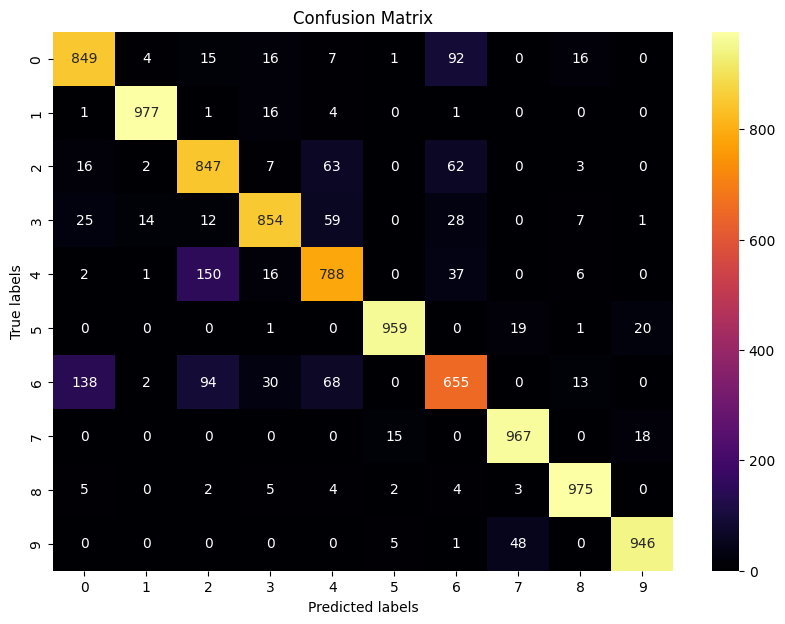

In [23]:
def main():
    '''
    WandB calls main function each time with differnet combination.

    We can retrive the same and use the same values for our hypermeters.

    '''


    with wandb.init() as run:
        config=wandb.config
        run_name="hl_"+str(config.hidden_layers)+"_bs_"+str(config.batch_size)+"_ac_"+config.activation_function
        wandb.run.name=run_name
        W1,b1=arguments(config.hidden_layers,config.hidden_layer_size,config.activation_function,config.weight_initialization,config.epochs,config.batch_size,config.learning_rate,config.weight_decay,0.9,0.9,0.999,1e-8,config.optimizer,config.loss,config.dataset)
        #confusionmatrix(W1,b1,config.hidden_layers,config.hidden_layer_size,config.activation_function)





wandb.agent(sweep_id, function=main,count=1) # calls main function for count number of times.
wandb.finish()